In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import datetime as dt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail Data Set.xlsx to Online Retail Data Set.xlsx


In [6]:
data = pd.read_excel("Online Retail Data Set.xlsx")

In [7]:
data = data.dropna(subset=['CustomerID'])

In [8]:
def getting_months(m):
    return dt.datetime(m.year, m.month,1)

In [9]:
data['Invoice-Month'] = data['InvoiceDate'].apply(getting_months)

In [10]:
data['Cohort-Month'] =  data.groupby('CustomerID')['Invoice-Month'].transform('min')
data.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice-Month,Cohort-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01


In [11]:
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [12]:
_,Invoiceofmonth,Invoiceofyear =  get_date_elements(data,'Invoice-Month')
_,Cohortofmonth,Cohortofyear =  get_date_elements(data,'Cohort-Month')

In [13]:
yeardifference = Invoiceofyear -Cohortofyear
monthdifference = Invoiceofmonth - Cohortofmonth
data['Cohort-Index'] = yeardifference*12+monthdifference+1

In [15]:
cohort_data = data.groupby(['Cohort-Month','Cohort-Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [16]:
cohort_table = cohort_data.pivot(index='Cohort-Month', columns=['Cohort-Index'],values='CustomerID')

In [17]:
cohort_table.index = cohort_table.index.strftime('%B %Y')

<Axes: xlabel='Cohort-Index', ylabel='Cohort-Month'>

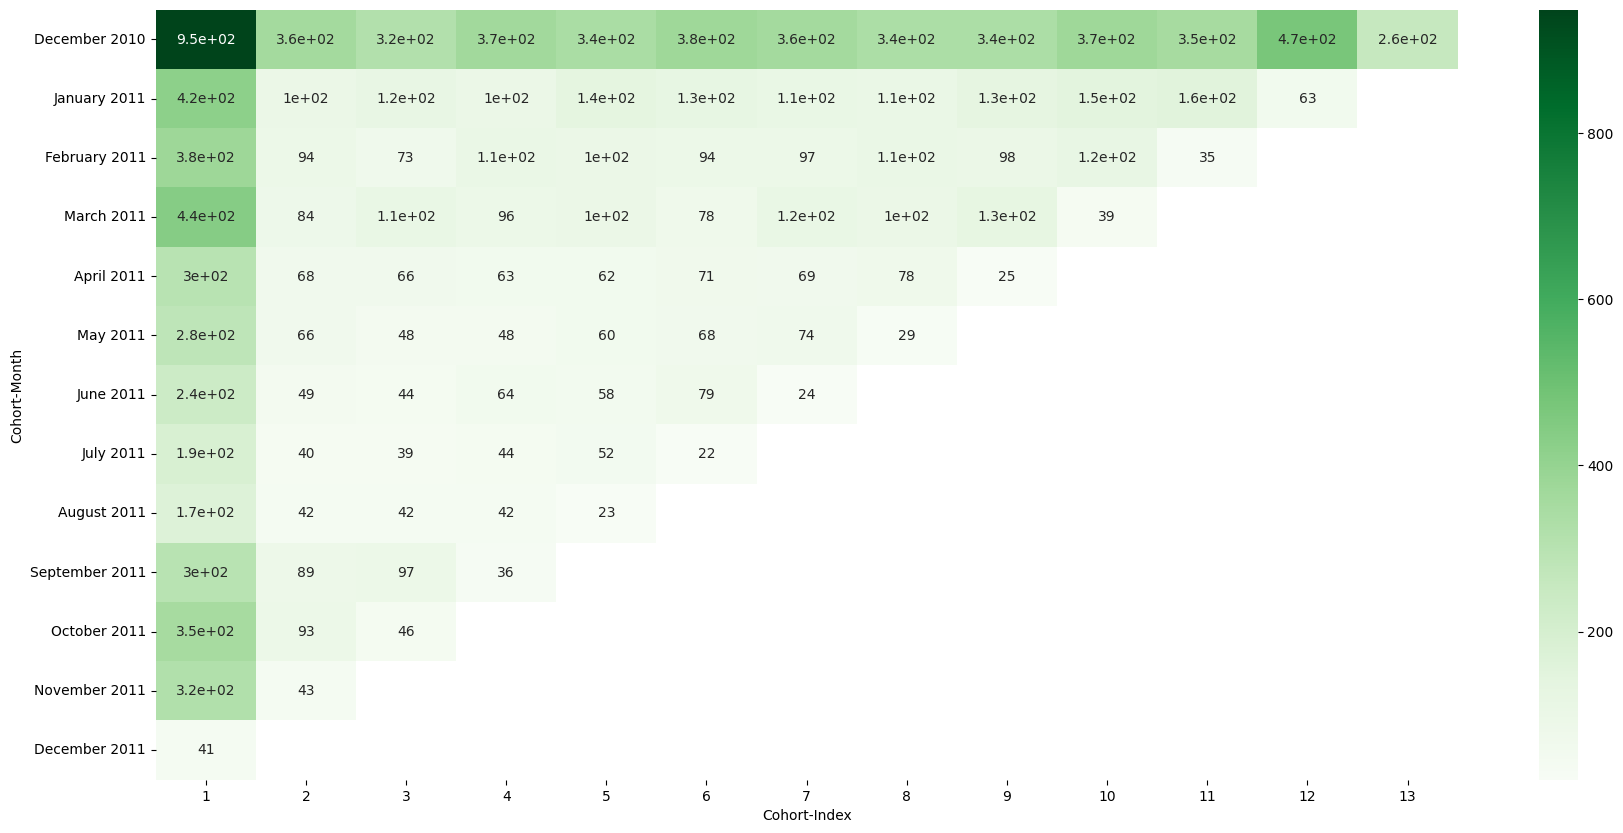

In [18]:
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Greens')

In [19]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

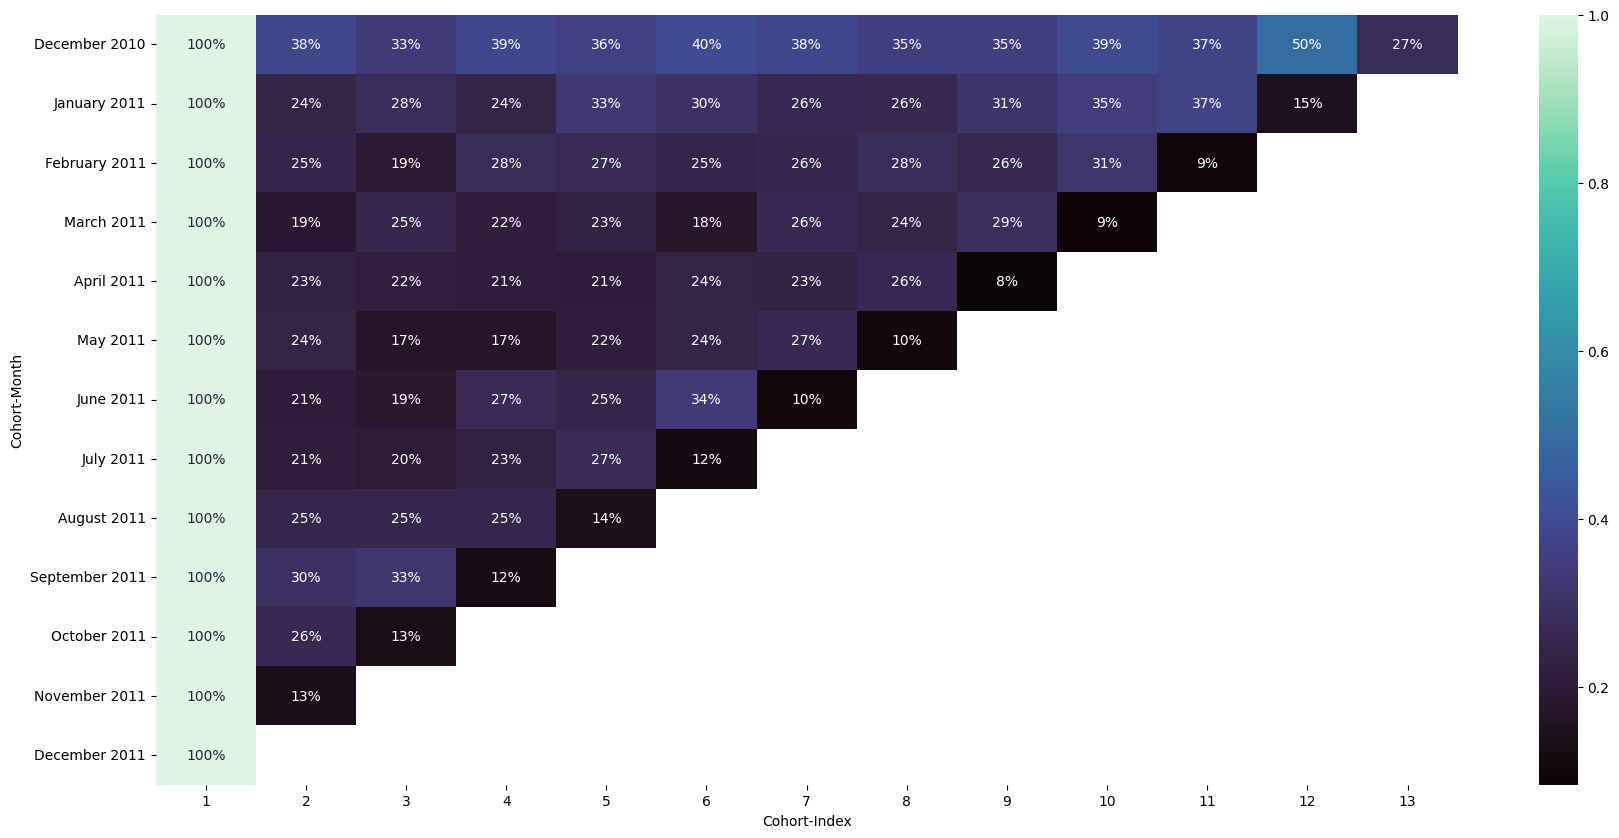

In [20]:
plt.figure(figsize=(21,10))
colormap=sns.color_palette("mako", as_cmap=True)
sns.heatmap(new_cohort_table,annot=True,fmt='.0%',cmap=colormap)
plt.show()